In [3]:
pwd

'C:\\Users\\Asus\\GRIP'

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#Importing the Csv file

path= 'C:\\Users\\Asus\\GRIP/SampleSuperstore.csv'
data= pd.read_csv(path)

#Lets have a look over the data
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.shape

(9994, 13)

In [8]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
#Checking for duplicate data 

data.duplicated().sum()

17

In [17]:
#lets remove the duplicate data

data.drop_duplicates(inplace=True)

In [18]:
data.duplicated().sum()

0

In [20]:
#After removing the duplicated data , we will remove the unnecessary data

data.Country.unique()

array(['United States'], dtype=object)

In [22]:
data.drop(columns=["Country","Postal Code"],inplace= True)
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
#Outlier Detection

In [26]:
#Let's select columns which have numbers in its value

data_s = data.select_dtypes(include=[np.number])
data_s.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [27]:
#Checking for outliers
cols= data_s.columns.to_list()
cols

['Sales', 'Quantity', 'Discount', 'Profit']

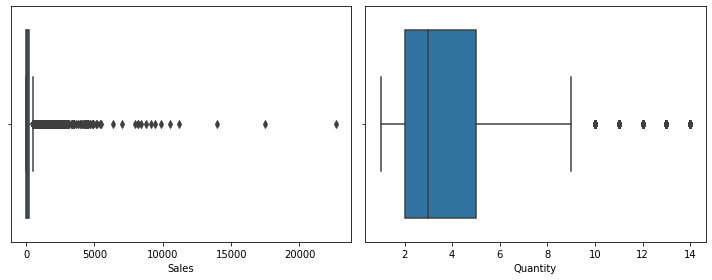

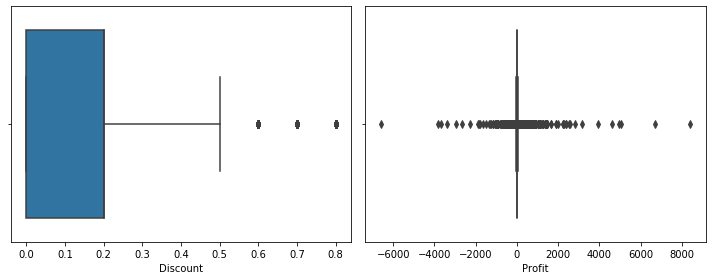

In [28]:
for col in range(0, len(cols), 2):
    if len(cols)> col + 1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(data_s[cols[col]])
        plt.subplot(122)
        sns.boxplot(data_s[cols[col+1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(data_s[cols[col]])
        
        

In [29]:
#Removal of outliers

In [30]:
from scipy.stats.mstats import winsorize 

for col in cols:
    if col in data_s.select_dtypes(include=np.number).columns:
        data_s[col]=winsorize(data_s[col],limits=[0.05,0.1],inclusive=(True,True))

data_s.shape

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(9977, 4)

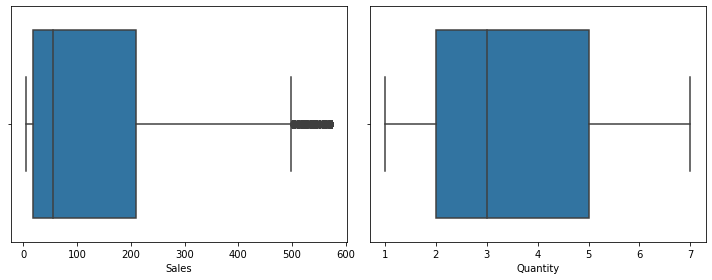

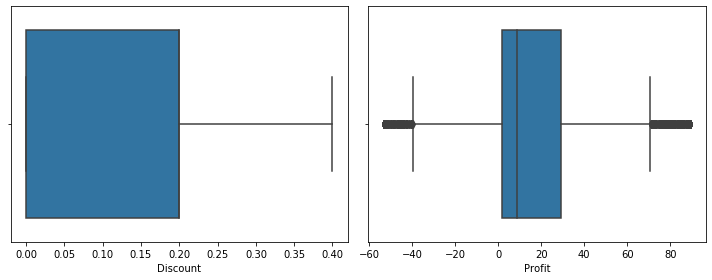

In [31]:
#taking a list of all features /columns
#boxplot of all features to identify outliers
for col in range(0, len(cols), 2):
    if len(cols)> col + 1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(data_s[cols[col]])
        plt.subplot(122)
        sns.boxplot(data_s[cols[col+1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(data_s[cols[col]])
        
        

In [32]:
#Let's check correlation between the columns

In [33]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


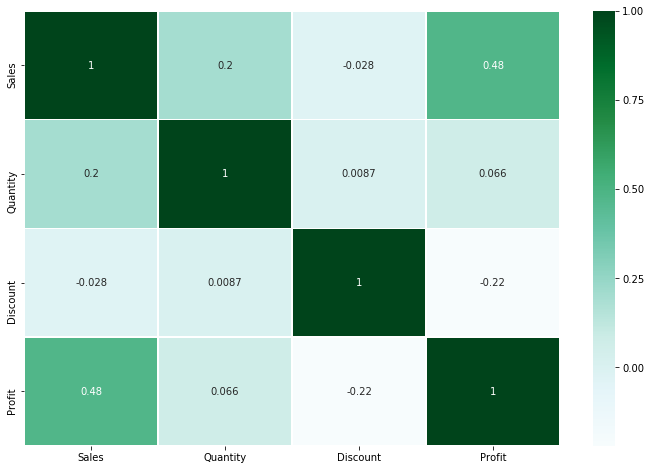

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, linewidths=0.5,cmap= "BuGn")

In [35]:
#Data Visualisation

In [40]:
print("Shipping mode types:",data['Ship Mode'].unique())
print("\n")
print("Segment types:",data['Segment'].unique())
print("\n")
print("Category of products:",data['Category'].unique())
print("\n")
print("Regions:",data['Region'].unique())
print("\n")
print("Sub_Categories:",data['Sub-Category'].unique())
print("\n")

Shipping mode types: ['Second Class' 'Standard Class' 'First Class' 'Same Day']


Segment types: ['Consumer' 'Corporate' 'Home Office']


Category of products: ['Furniture' 'Office Supplies' 'Technology']


Regions: ['South' 'West' 'Central' 'East']


Sub_Categories: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']




In [41]:
#Data visualization with accordance to sales and profit

<Figure size 576x360 with 0 Axes>

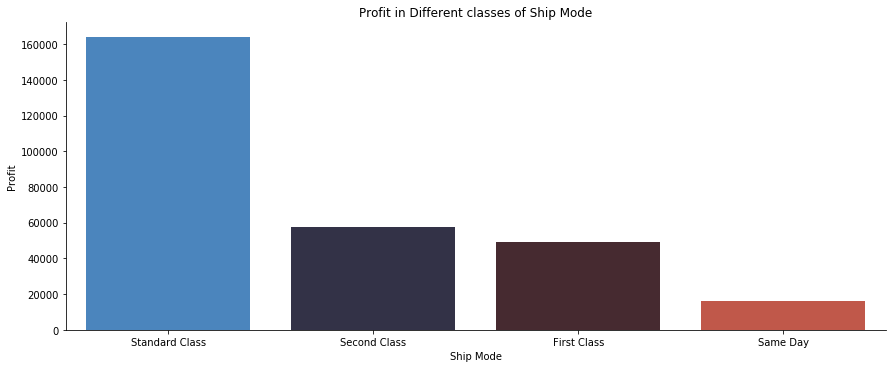

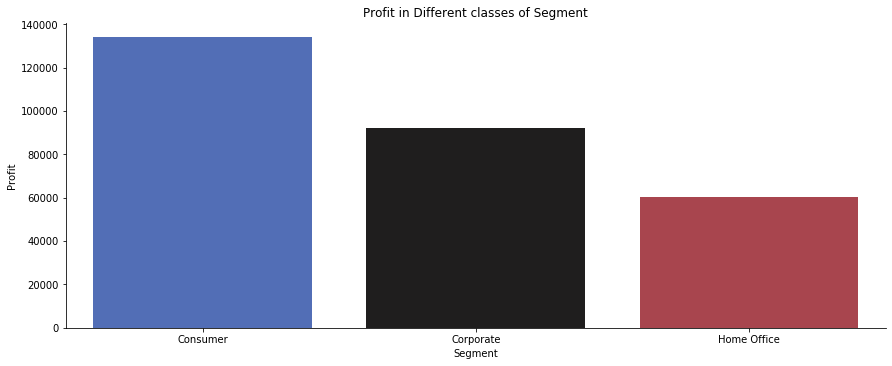

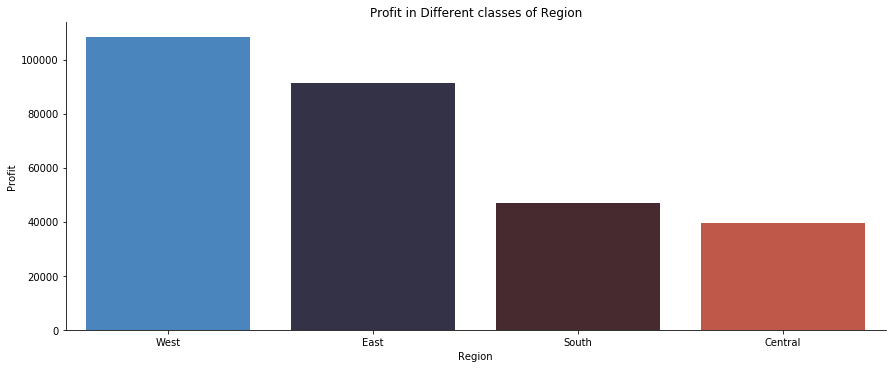

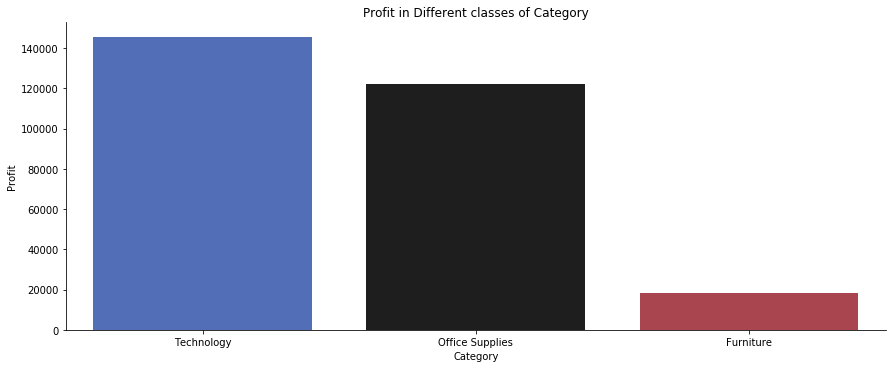

In [47]:
explore_col= ['Ship Mode','Segment','Region','Category']
plt.figure(figsize=(8,5))
for i in explore_col:
    un_sor= data.groupby(i)['Profit'].sum().to_frame().reset_index().sort_values(by= 'Profit',ascending= False)
    sns.catplot(x=i,y='Profit',data= un_sor, kind ='bar', aspect=2.5, palette='icefire')
    plt.ylabel('Profit')
    plt.xlabel(i)
    plt.title('Profit in Different classes of {}'.format(i))
    plt.show()
    print('\n')

In [49]:
#Sales of different classes of object type features of dataset

<Figure size 576x360 with 0 Axes>

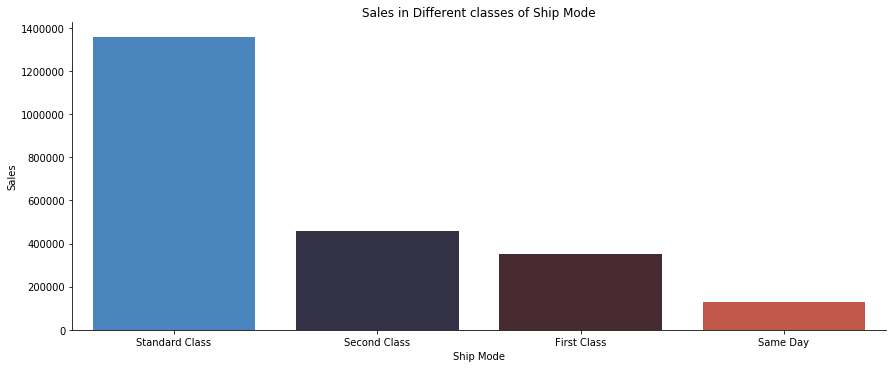

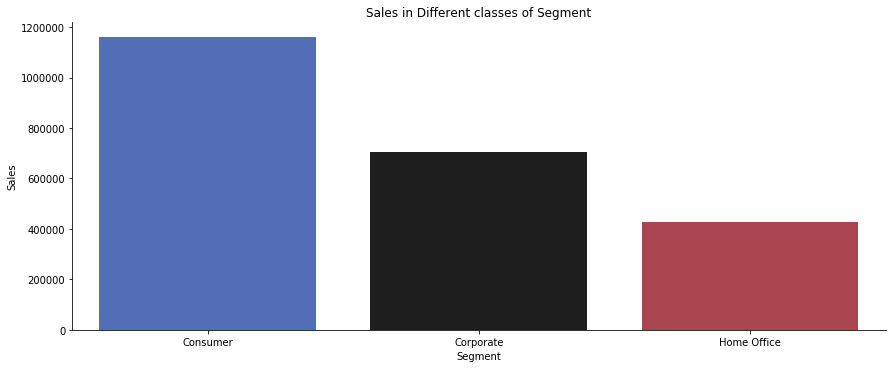

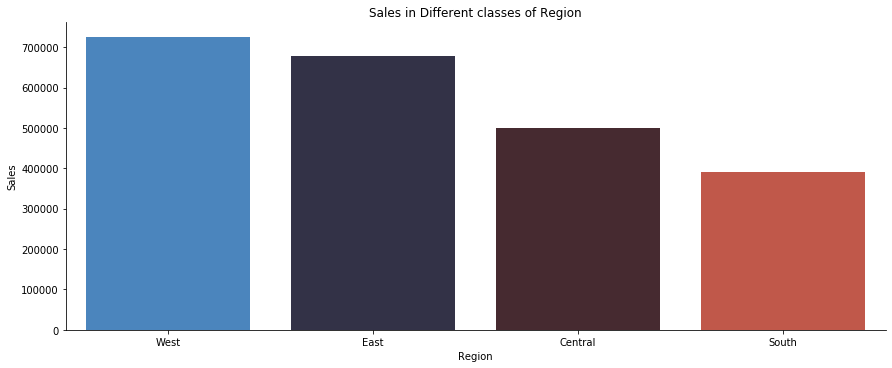

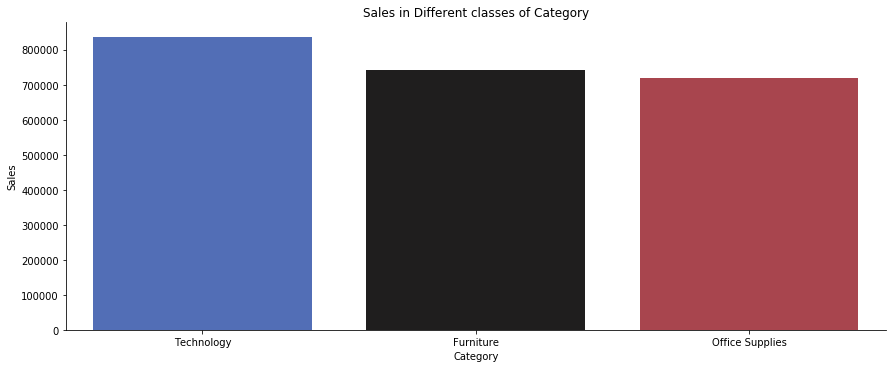

In [51]:
plt.figure(figsize=(8,5))
for i in explore_col:
    un_sor= data.groupby(i)['Sales'].sum().to_frame().reset_index().sort_values(by= 'Sales',ascending= False)
    sns.catplot(x=i,y='Sales',data= un_sor, kind ='bar', aspect=2.5, palette='icefire')
    plt.ylabel('Sales')
    plt.xlabel(i)
    plt.title('Sales in Different classes of {}'.format(i))
    plt.show()
    print('\n')

In [52]:
#Counter plot of different features in object type columns of dataset

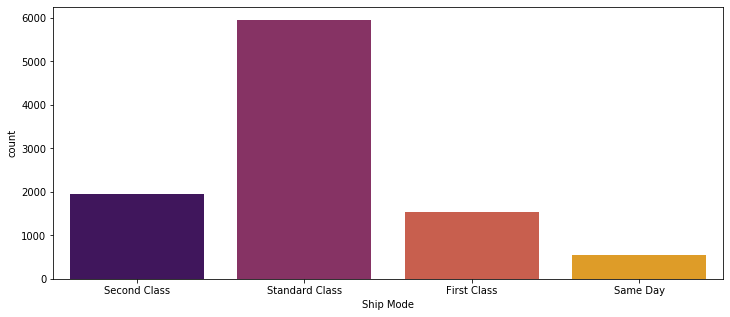

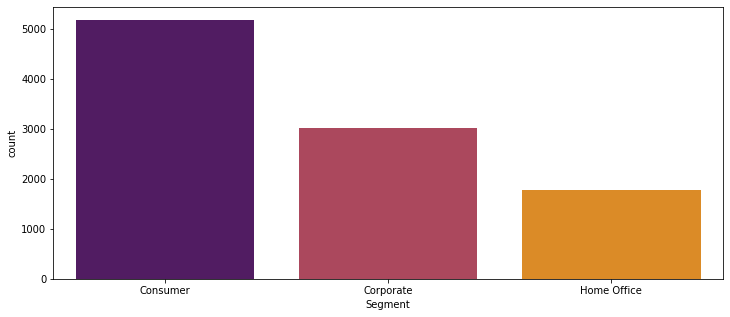

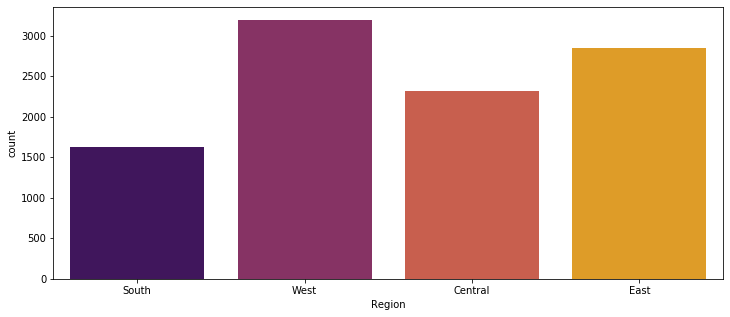

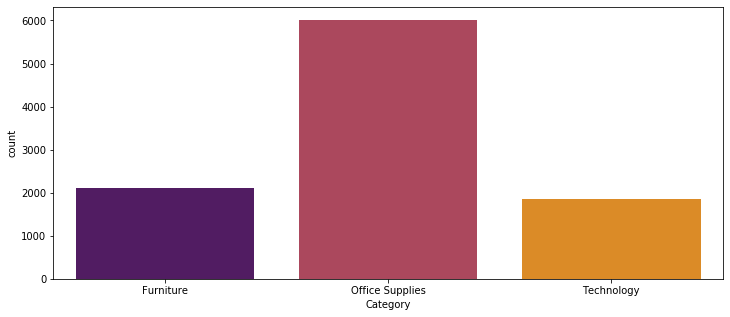

In [54]:
for i in explore_col:
    plt.figure(figsize=(12,5))
    sns.countplot(data[i],palette='inferno')
    plt.show()

In [56]:
#Observation

# In the ship mode, the standard Class has the highest count which means the customes give the highest priority to this type of 
# shipping mode.

# In segment,the customers have the highest count which means that the consumers do the most of the shipping.

# From the regions graph, we observe that the West region has the highest customers count.

# From the items category, we observe that the Office Supplies Category has the highest sales discount.



In [57]:
#sub category wise data visualization

Text(0, 0.5, 'Profit')

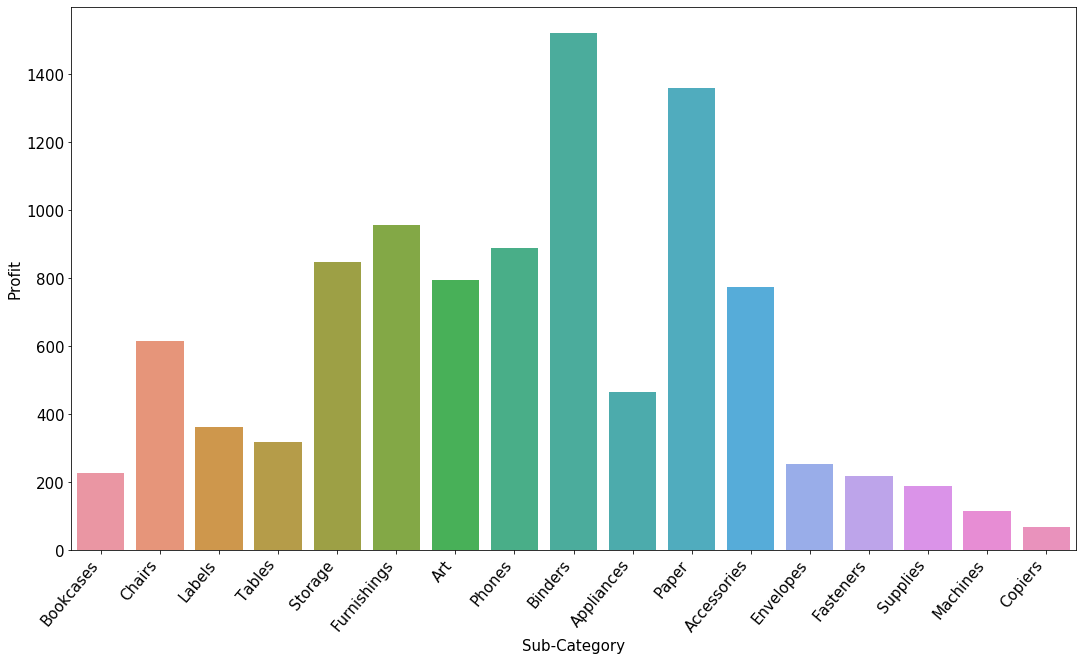

In [61]:
plt.figure(figsize=(18,10))
sns.countplot(data['Sub-Category'])
plt.xticks(rotation=50, ha= 'right',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Profit',fontsize=15)

In [63]:
sub=data.groupby('Sub-Category')['Profit'].sum().to_frame().reset_index()
sub=sub.sort_values(by='Profit',ascending=False)

Text(0, 0.5, 'Profit')

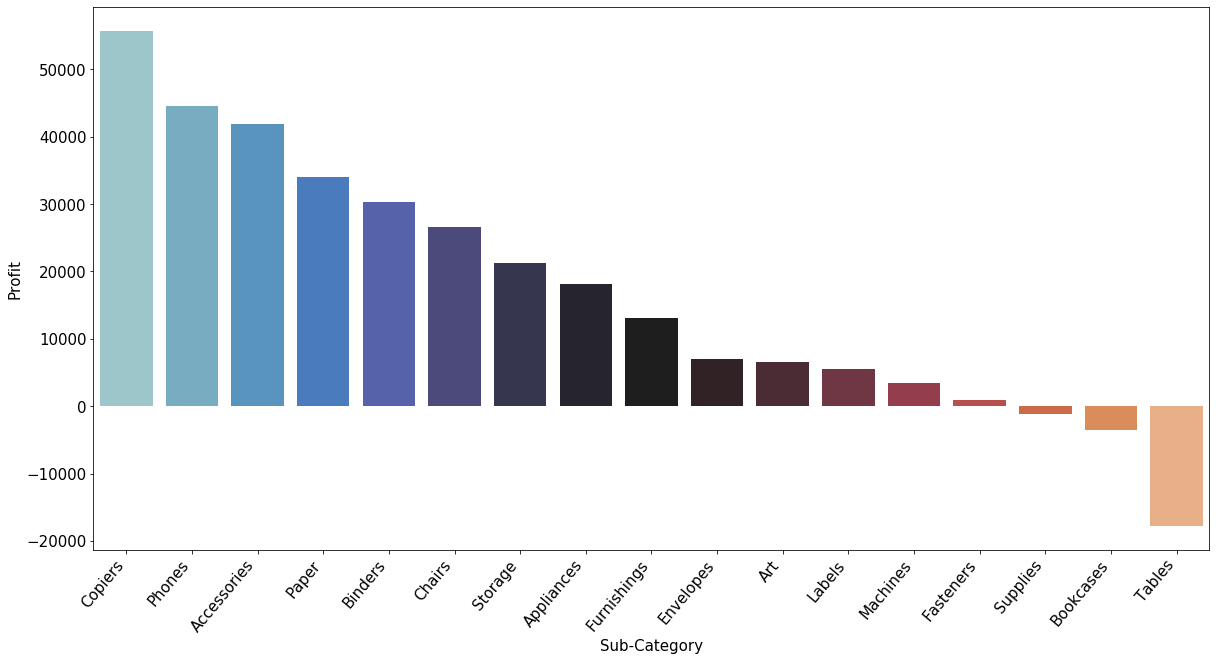

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(x='Sub-Category',y='Profit',data= sub,palette='icefire')
plt.yticks(fontsize=15)
plt.xticks(rotation = 50, ha='right',fontsize= 15)
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Profit',fontsize=15)

In [67]:
#Observations

# From the above graph, we observe that some of the most profitable selling products are Copiers, Phones, Accessories. We also 
# observe that Machines have the lower count aswell as profits, hence it is of least value. And copiers gain higher profits 
# despite having least count.

# Also, Supplies, Bookcases and Tables are running in loss. One should look at the factors which are responsible for this loss.



In [68]:
#State wise data visualization

In [70]:
top_sales_state= data.groupby('State')['Sales'].sum().to_frame().reset_index().nlargest(10,'Sales')
print("Top 10 states with highest sales: ")
print(top_sales_state)
print('\n')

top_profit_state= data.groupby('State')['Profit'].sum().to_frame().reset_index().nlargest(10,'Profit')
print("Top 10 states with highest profit: ")
print(top_profit_state)
print('\n')


Top 10 states with highest sales: 
           State        Sales
3     California  457576.2715
30      New York  310827.1510
41         Texas  170124.5418
45    Washington  138560.8100
36  Pennsylvania  116496.3620
8        Florida   89473.7080
11      Illinois   80162.5370
33          Ohio   77976.7640
20      Michigan   75879.6440
44      Virginia   70636.7200


Top 10 states with highest profit: 
         State      Profit
3   California  76330.7891
30    New York  74015.4622
45  Washington  33368.2375
20    Michigan  24428.0903
44    Virginia  18597.9504
12     Indiana  18382.9363
9      Georgia  16250.0433
15    Kentucky  11199.6966
21   Minnesota  10823.1874
6     Delaware   9977.3748




Text(0, 0.5, 'Sales')

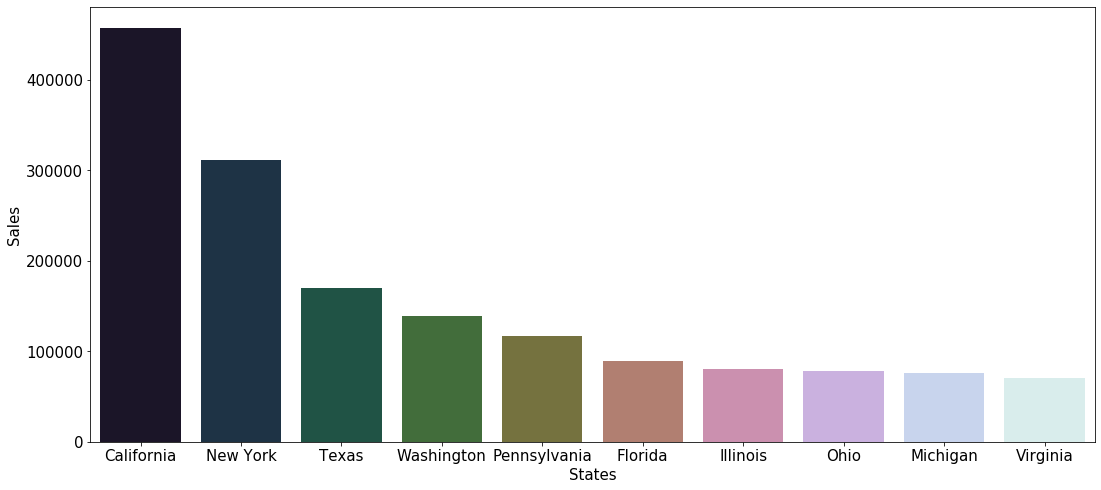

In [78]:
plt.figure(figsize=(18,8))
sns.barplot(x='State',y= 'Sales',data= top_sales_state,palette = 'cubehelix')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('States', fontsize= 15)
plt.ylabel('Sales',fontsize= 15)

Text(0, 0.5, 'Profit')

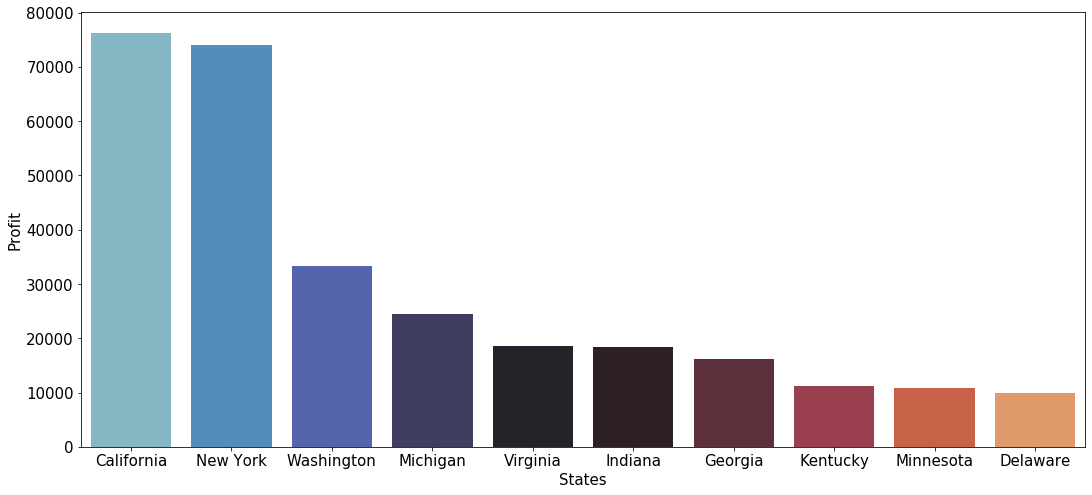

In [79]:
plt.figure(figsize=(18,8))
sns.barplot(x='State',y= 'Profit',data= top_profit_state,palette = 'icefire')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('States', fontsize= 15)
plt.ylabel('Profit',fontsize= 15)

In [80]:
# Observations

# We observe that the top- selling states are California, New York and Texas.

# and the most profitable states are California, New York and Washington.

# We can also see that there is a negative factor in the states like Texas, Pennsylvania, Florida etc. by which 
# they were not able to come in the top 10 most profitable states even though they are among the top 10 states with most sales.



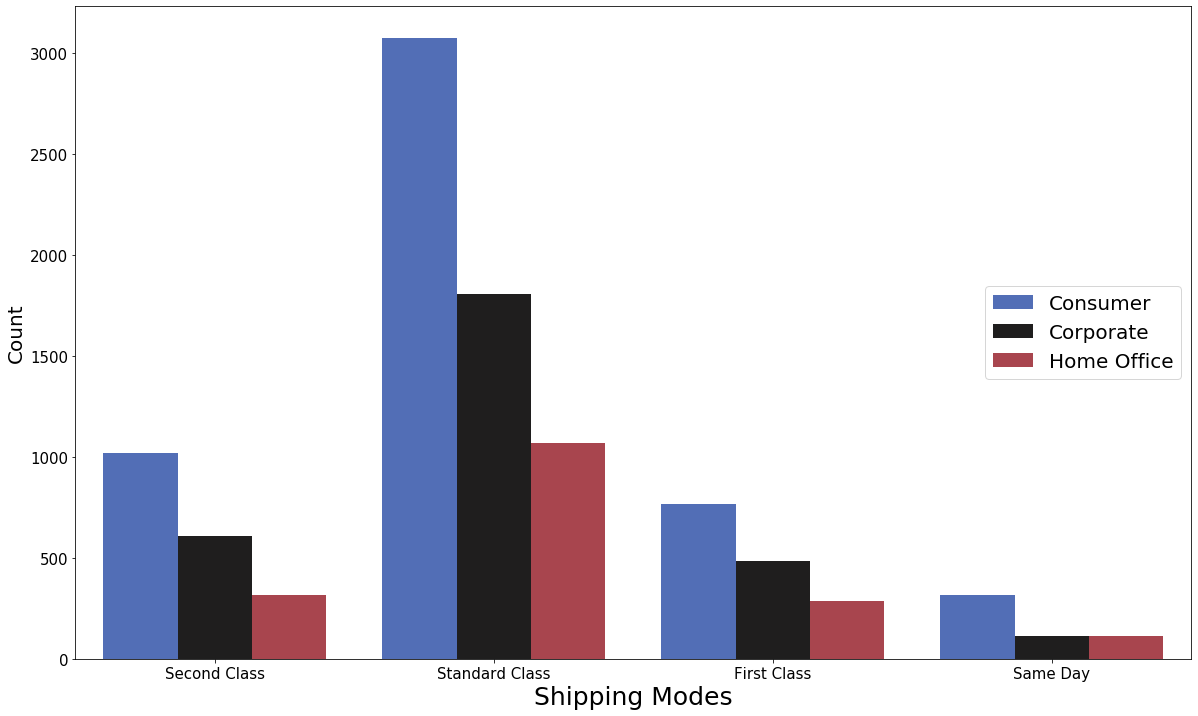

In [82]:
plt.figure(figsize=(20,12))
sns.countplot(x='Ship Mode', hue='Segment',data= data, palette= 'icefire')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Shipping Modes', fontsize= 25)
plt.ylabel('Count',fontsize=20)
plt.legend(loc=5, fontsize=20)

In [83]:
#Observation

# We can see , Standard class is the most preferable shipping mode and most of the orders are done by consumers which are 
# followed by corporate.


In [84]:
#Region wise data vizualization

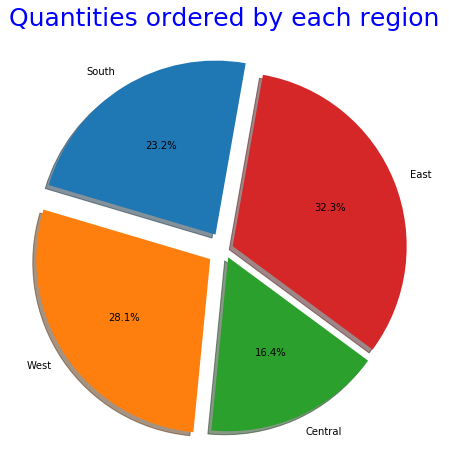

In [87]:
region= data.groupby('Region')['Quantity'].sum().reset_index()
labels= data['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(region['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0.05,0.05),shadow=True,startangle=80)
plt.title('Quantities ordered by each region',size=25, color='blue')
plt.show()

In [88]:
#Observation
# From the pie chart we observe that most no. of quantities ordered are from east region

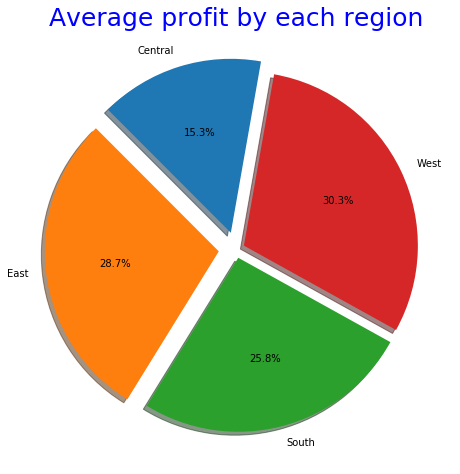

In [90]:
region= data.groupby('Region')['Profit'].mean().reset_index()
labels= data['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(region['Profit'],autopct='%1.1f%%',labels=region['Region'].unique(),explode=(0.1,0.1,0.05,0.05),shadow=True,startangle=80)
plt.title('Average profit by each region',size=25, color='blue')
plt.show()

In [91]:
#Observation
# FRom the pie chart we observe that the central region is least profitable and west region is most profitable

In [92]:
#Product wise data Visualization

In [94]:
items= data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by= 'Profit',ascending=False)
items.head()

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,33944.2395
3,Binders,30228.0003


Text(0.5, 6.799999999999997, 'product')

<Figure size 1440x720 with 0 Axes>

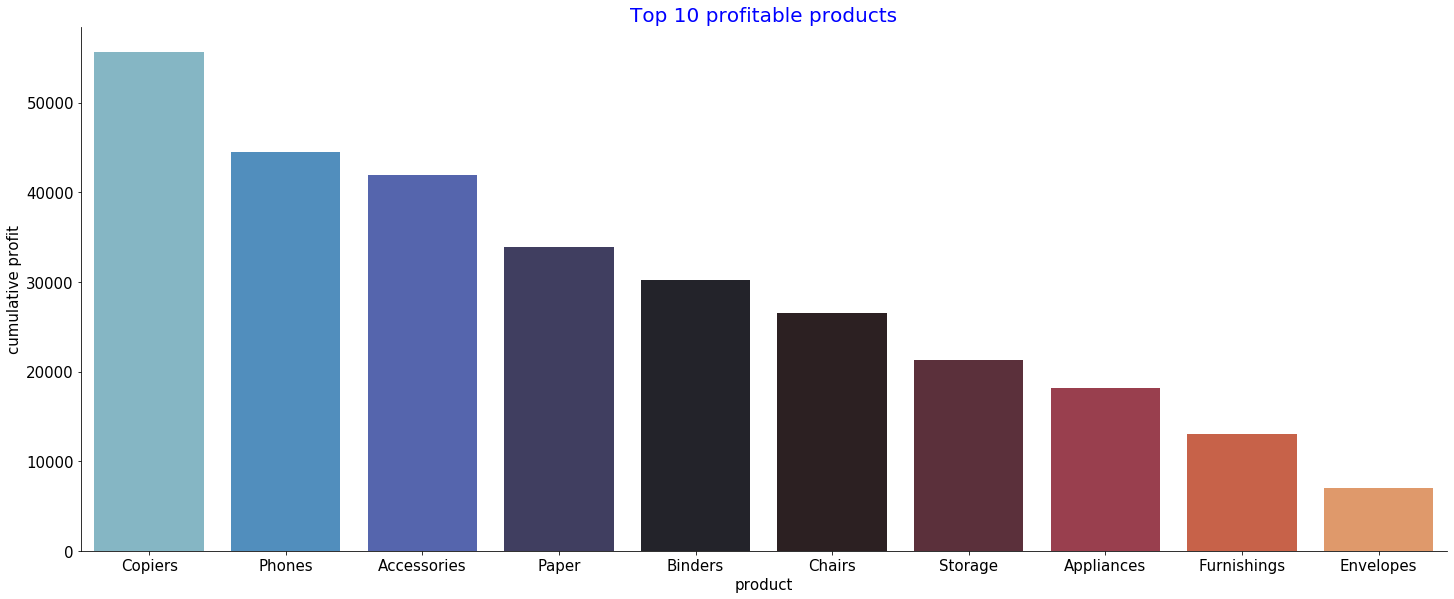

In [98]:
plt.figure(figsize=(20,10))
sns.catplot('Sub-Category','Profit',data=items.head(10),kind='bar',aspect=2.5, height=8, palette= 'icefire')
plt.title('Top 10 profitable products',size= 20, color='blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('cumulative profit',size=15)
plt.xlabel('product',size=15)

In [100]:
#Observation 
# Copiers, Phones and Accessories are the most profitable products

In [101]:
items= data.groupby('Sub-Category')['Profit'].sum().reset_index().nsmallest(5,'Profit')
items

,Sub-Category,Profit
16,Tables,-17725.4811
4,Bookcases,-3472.5560
15,Supplies,-1189.0995
8,Fasteners,949.5182
11,Machines,3384.7569


In [ ]:
#AREAS WHERE WE CAN IMPROVE

# Since the least profitable sub- category is Tables, Bookcases and suppliers sales team should look factrs which are 
# harming their profits and should find ways to boost profit.

# Since most of the shipping modes preferred are of standard class and the least preferred are same day and first class modes,
# we should dip down their prices to show customers how convenient they are.

# The advertisement should be done in the south region to generate awareness about the company.

# We can also see there is a negative factor in the states like Texas, Pennsylvania, Florida etc. by which they were not able 
# to come in top ten most profitable states even though they are among top ten states with most sales.

# Furniture category is showing least profit, so strategies like bringing new, branded and quality product in the category 
# should be encouraged in the company.
 